In [5]:
import pandas as pd

In [6]:
df=pd.read_csv('car data.csv')

In [7]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [8]:
df.shape

(301, 9)

In [9]:
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [11]:
fdf=df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [12]:
fdf['current_year']=2020

In [13]:
fdf.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [14]:
fdf['No_Of_Years']=fdf['current_year']-fdf['Year']

In [15]:
fdf.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year,No_Of_Years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [14]:
fdf.drop(['Year','current_year'],axis=1,inplace=True)

In [15]:
fdf.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [16]:
fdf=pd.get_dummies(fdf,drop_first=True)

In [17]:
fdf.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,0,1,0,1
1,4.75,9.54,43000,0,1,0,0,1
2,7.25,9.85,6900,0,0,1,0,1
3,2.85,4.15,5200,0,0,1,0,1
4,4.60,6.87,42450,0,1,0,0,1


In [18]:
import seaborn as sb

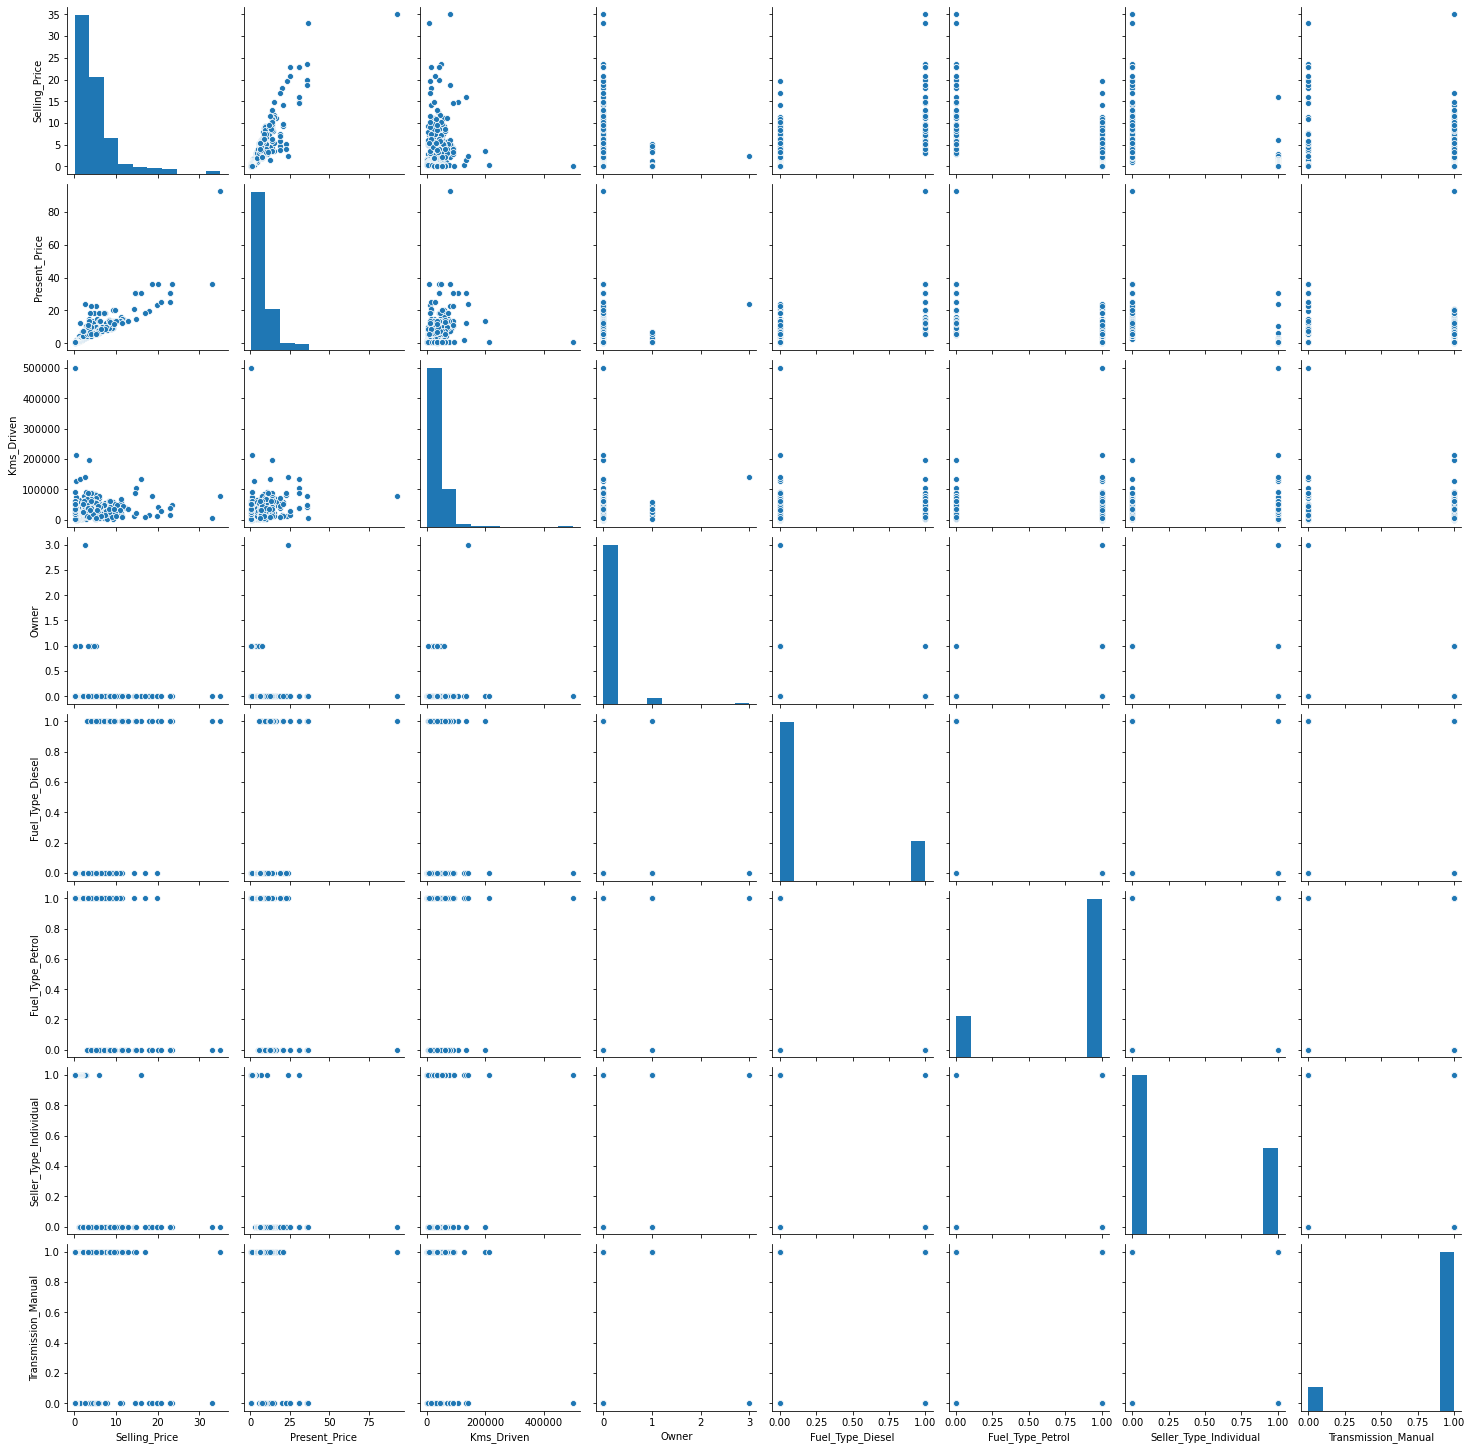

In [19]:
sb.pairplot(fdf)

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

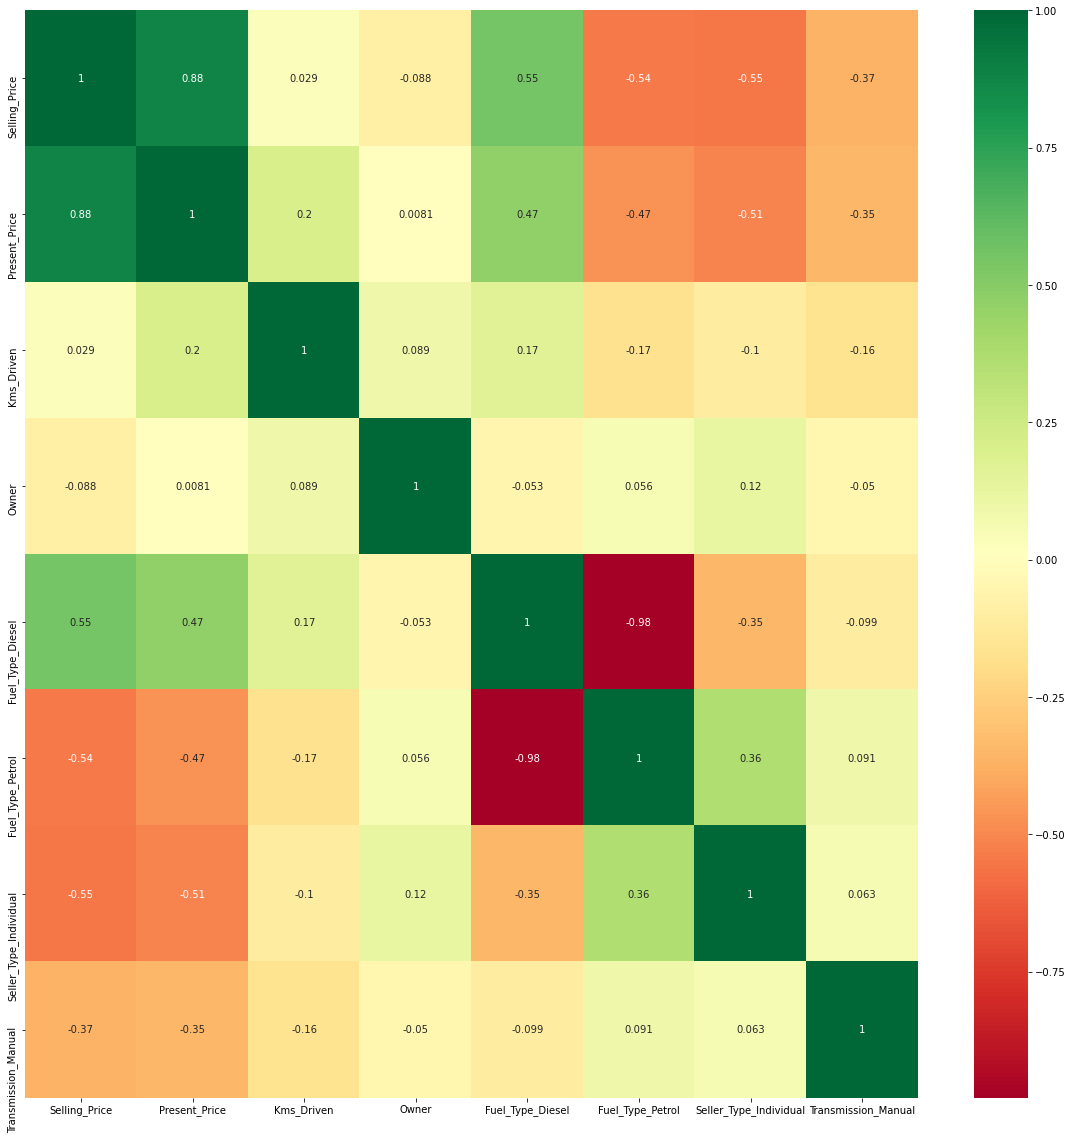

In [24]:
corrmat=fdf.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))

#plot heat map
g=sb.heatmap(fdf[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [29]:
##independent_
X=fdf.iloc[:,1:]
Y=fdf.iloc[:,0]

In [30]:
X

,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,0,1,0,1
1,9.54,43000,0,1,0,0,1
2,9.85,6900,0,0,1,0,1
3,4.15,5200,0,0,1,0,1
4,6.87,42450,0,1,0,0,1
...,...,...,...,...,...,...,...
296,11.60,33988,0,1,0,0,1
297,5.90,60000,0,0,1,0,1
298,11.00,87934,0,0,1,0,1
299,12.50,9000,0,1,0,0,1


In [31]:
Y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [32]:
#feature important
from sklearn.ensemble  import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,Y)

ExtraTreesRegressor()

In [33]:
print(model.feature_importances_) 

[0.41246722 0.09960525 0.00126191 0.21788947 0.01230316 0.12140563
 0.13506736]


In [34]:
from sklearn.model_selection  import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [35]:
X_train.shape

(240, 7)

In [36]:
from sklearn.ensemble import RandomForestRegressor
rf_random=RandomForestRegressor()

In [37]:
#hyperparameter
import numpy as np
n_estimator=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
print(n_estimator)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [38]:
from sklearn.model_selection import RandomizedSearchCV

In [40]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


In [41]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [43]:
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [44]:
rf_random.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.7s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   2.0s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.5s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.3s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.3min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [45]:
prediction=rf_random.predict(X_test)

In [46]:
prediction


array([16.01544   ,  5.88469   ,  5.58375   ,  6.97705   ,  0.54393667,
        1.03823   ,  4.24519583,  5.48678   ,  9.19335   ,  4.81585   ,
        0.53337   , 10.10558   ,  5.0879    ,  3.2047    ,  0.43608   ,
        8.74457   ,  0.5702    ,  3.05731   ,  1.05004   ,  3.9775    ,
        8.12249   ,  0.83764   ,  0.28041   ,  5.01745   ,  5.7023    ,
        3.93535   ,  0.61676333,  7.452     , 20.735     ,  5.83945   ,
        1.51645   ,  1.16048   ,  0.84087833,  0.27468   ,  4.22330833,
        0.40175167,  4.65995   ,  0.22736   ,  2.69307   ,  4.69671   ,
        0.43578333,  6.25652   , 18.49909   ,  0.543995  ,  0.51978655,
        4.2498125 , 10.42922   ,  5.51391   ,  0.53333   ,  4.63755   ,
        6.680075  ,  2.60145   ,  2.26501   ,  1.11516083,  6.54433667,
        6.54433667,  0.94579   ,  0.58859   , 14.17562   ,  6.58021   ,
        3.057     ])

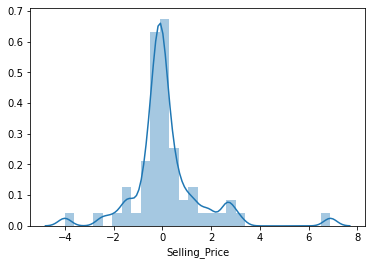

In [48]:
sb.distplot(Y_test-prediction)

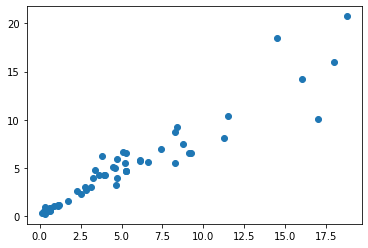

In [49]:
plt.scatter(Y_test,prediction)

In [50]:
  from sklearn import metrics


In [53]:
print('MAE:', metrics.mean_absolute_error(Y_test, prediction))
print('MSE:', metrics.mean_squared_error(Y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, prediction)))

MAE: 0.8652253122560484
MSE: 2.1502926407573626
RMSE: 1.4663876161361165


In [55]:
import pickle
# open a file, where you ant to store the data
file = open('car_random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)
